In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point
from IPython.display import display

In [2]:
# !pip install plotly

In [20]:
# !pip install ipywidgets

In [3]:
bs_crab = pd.read_csv("../data/Armistead; 1975 - 2017 eastern Bering Sea Crab Distribution For Web.csv")

In [4]:
NOAA_bottomtrawl = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")

C:\Users\seanf\AppData\Local\Temp\ipykernel_22176\1276909703.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  NOAA_bottomtrawl = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")


In [5]:
merged = pd.merge(bs_crab, NOAA_bottomtrawl, on=['cruise', 'haul', 'vessel'], how='inner')

In [6]:
bs_crab['common_name'].value_counts()

common_name
snow crab               76678
southern Tanner crab    63414
red king crab           21622
hybrid Tanner crab      14737
blue king crab           7786
hair crab                5201
Name: count, dtype: int64

In [7]:
red_king = bs_crab[bs_crab['common_name'] == 'red king crab']
blue_king = bs_crab[bs_crab['common_name'] == 'blue king crab']
snow_crab = bs_crab[bs_crab['common_name'] == 'snow crab']
southern_tanner = bs_crab[bs_crab['common_name'] == 'southern Tanner crab']
hybrid_tanner = bs_crab[bs_crab['common_name'] == 'hybrid Tanner crab']
hair_crab = bs_crab[bs_crab['common_name'] == 'hair crab']

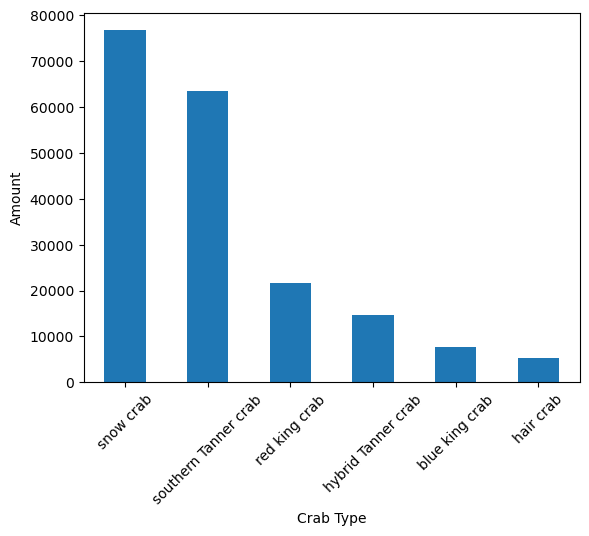

In [8]:
bs_crab['common_name'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Crab Type')
plt.xticks(rotation=45)
plt.show()

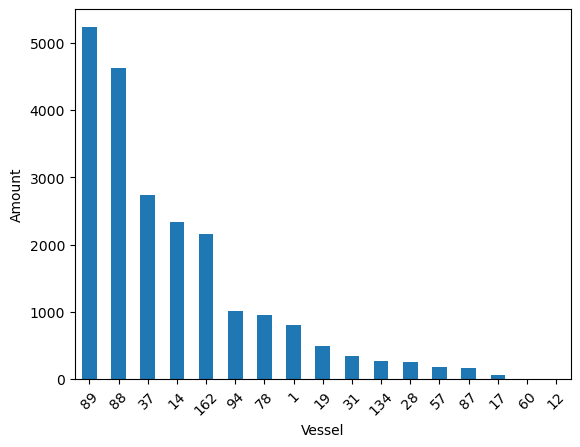

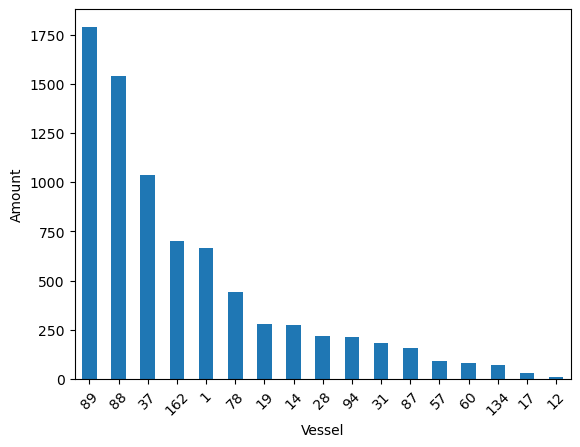

In [9]:
red_king['vessel'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Vessel')
plt.xticks(rotation=45)
plt.show()

blue_king['vessel'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Vessel')
plt.xticks(rotation=45)
plt.show()

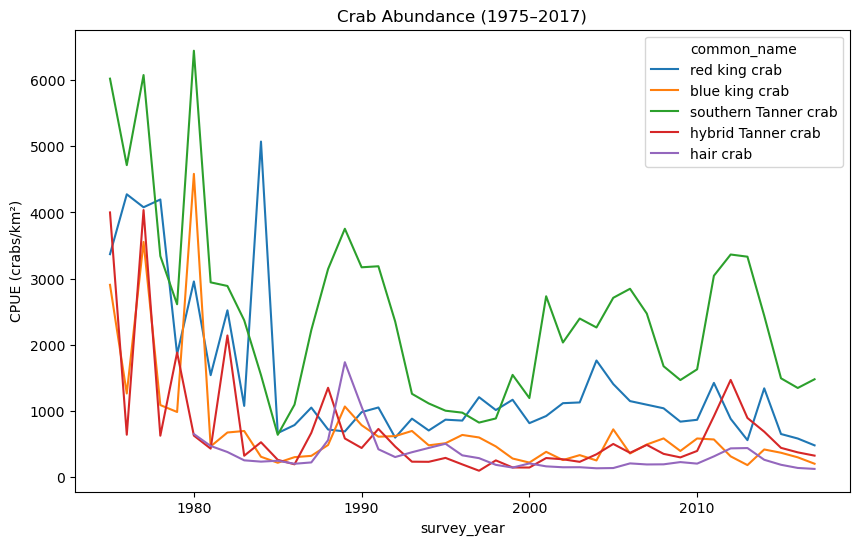

In [10]:
trends = bs_crab.groupby(['survey_year', 'common_name'])['cpue'].mean().unstack()

trends[['red king crab', 'blue king crab', 'southern Tanner crab', 'hybrid Tanner crab', 'hair crab']].plot(
    title='Crab Abundance (1975–2017)',
    ylabel='CPUE (crabs/km²)',
    figsize=(10, 6)
)
plt.show()

In [11]:
filtered_noaa = NOAA_bottomtrawl[['crab_id', 'hauljoin', 'cruise', 'vessel', 'haul', 'station', 'species_kfrc', 'species', 'sex',
 'shell_condition', 'sampling_factor', 'gis_station', 'width', 'weight', 'disease_dorsal', 'disease_ventral', 'disease_legs']]

In [12]:
cln_disease = filtered_noaa[[
    'crab_id', 'hauljoin', 'cruise', 'vessel', 'haul', 'station', 
    'species_kfrc', 'species', 'sex','shell_condition', 
    'sampling_factor', 'gis_station', 'width', 'weight', 
    'disease_dorsal', 'disease_ventral', 'disease_legs']].dropna(subset=['disease_dorsal', 'disease_ventral', 'disease_legs'], how='any')

In [13]:
filtered_noaa

,crab_id,hauljoin,cruise,vessel,haul,station,species_kfrc,species,sex,shell_condition,sampling_factor,gis_station,width,weight,disease_dorsal,disease_ventral,disease_legs
0,689,899411.0,199701,88,103,P19,4,Horsehair,Male,1,1.0000,P-19,NaN,NaN,NaN,NaN,NaN
1,690,899411.0,199701,88,103,P19,4,Horsehair,Male,1,1.0000,P-19,NaN,NaN,NaN,NaN,NaN
2,691,899411.0,199701,88,103,P19,4,Horsehair,Male,1,1.0000,P-19,NaN,NaN,NaN,NaN,NaN
3,692,899411.0,199701,88,103,P19,7,Snow,Female,1,1.0000,P-19,68.0,NaN,NaN,NaN,NaN
4,693,899411.0,199701,88,103,P19,7,Snow,Male,1,1.0000,P-19,83.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1058405,13050.0,199301,89,137,J24,7,Snow,Male,2,1.8047,J-24,70.0,NaN,NaN,NaN,NaN
1048571,1058406,13050.0,199301,89,137,J24,7,Snow,Male,2,1.8047,J-24,60.0,NaN,NaN,NaN,NaN
1048572,1058407,13054.0,199301,89,141,N24,7,Snow,Female,3,1.0000,N-24,51.0,NaN,NaN,NaN,NaN
1048573,1058408,13054.0,199301,89,141,N24,7,Snow,Female,2,1.0000,N-24,42.0,NaN,NaN,NaN,NaN


In [14]:
cln_disease

,crab_id,hauljoin,cruise,vessel,haul,station,species_kfrc,species,sex,shell_condition,sampling_factor,gis_station,width,weight,disease_dorsal,disease_ventral,disease_legs
9348,9226,899689.0,199701,89,55,A04,6,Tanner,Female,4,1.0,A-04,77.0,NaN,8.0,3.0,0.0
9358,9236,899689.0,199701,89,55,A04,6,Tanner,Female,2,1.0,A-04,48.0,NaN,1.0,2.0,2.0
385033,393352,8231.0,198001,31,1,A04,6,Tanner,Male,2,1.0,A-04,85.0,NaN,9.0,1.0,0.0
385047,393366,8231.0,198001,31,1,A04,6,Tanner,Female,2,1.0,A-04,89.0,NaN,1.0,1.0,0.0
393568,391951,8232.0,198001,31,2,B04,6,Tanner,Male,2,1.0,B-04,136.0,NaN,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024042,1032411,12782.0,199301,88,74,A02,6,Tanner,Male,3,1.0,A-02,92.0,NaN,1.0,3.0,1.0
1026720,1037257,12874.0,199301,88,166,G22,7,Snow,Male,3,1.0,G-22,106.0,NaN,0.0,1.0,3.0
1026728,1037265,12874.0,199301,88,166,G22,7,Snow,Male,3,1.0,G-22,98.0,NaN,0.0,1.0,5.0
1026729,1037266,12874.0,199301,88,166,G22,7,Snow,Male,3,1.0,G-22,96.0,NaN,1.0,3.0,8.0


In [15]:
print(cln_disease['cruise'].value_counts().head())
print(cln_disease['species'].value_counts().head())

cruise
198203    238
198201    143
198103    128
198002    124
198001     77
Name: count, dtype: int64
species
Snow             587
Tanner           352
Hybrid Tanner     41
Blue King          1
Horsehair          1
Name: count, dtype: int64


In [16]:
bs_crab[bs_crab['cruise'] == 198203].head()

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,bottom_temperature,vessel,cruise,haul,data_date,location_1,latitude,longitude,:@computed_region_btis_nwva
24059,B-08,1982,1982-06-12T00:00:00.000,red king crab,Paralithodes camtschaticus,1408,1,Immature male,55,5.7,4.4,1,198203,37,2017-11-21T00:00:00.000,"{'latitude': '55.3375', 'longitude': '-163.42'}",55.33750,-163.42000,3.0
24060,I-12,1982,1982-06-07T00:00:00.000,red king crab,Paralithodes camtschaticus,5419,1,Immature male,59,2.1,0.8,1,198203,13,2017-11-21T00:00:00.000,"{'latitude': '57.67', 'longitude': '-160.91167'}",57.67000,-160.91167,3.0
24061,I-06,1982,1982-06-14T00:00:00.000,red king crab,Paralithodes camtschaticus,225,1,Immature male,57,3.7,0.4,1,198203,46,2017-11-21T00:00:00.000,"{'latitude': '57.66917', 'longitude': '-164.62...",57.66917,-164.62084,NaN
24065,F-14,1982,1982-05-29T00:00:00.000,red king crab,Paralithodes camtschaticus,72,1,Immature male,40,2.8,0.7,1,198203,4,2017-11-21T00:00:00.000,"{'latitude': '56.67667', 'longitude': '-159.77...",56.67667,-159.77667,3.0
24067,K-14,1982,1982-06-06T00:00:00.000,red king crab,Paralithodes camtschaticus,163,1,Immature male,26,1.1,0.8,1,198203,10,2017-11-21T00:00:00.000,"{'latitude': '58.33334', 'longitude': '-159.54...",58.33334,-159.54417,3.0


In [32]:
bad_cruise_data = bs_crab[bs_crab['cruise'] == 198203]

center_lat = bad_cruise_data['latitude'].mean()
center_lon = bad_cruise_data['longitude'].mean()

In [33]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=6, tiles="OpenStreetMap")

In [36]:
subset = bs_crab[bs_crab['cruise'] == 198203].head(20)

for _, row in subset.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color='crimson',
        fill=True,
        fill_opacity=0.8,
        popup=f"Depth: {row['bottom_depth']}" if 'bottom_depth' in row else None
    ).add_to(m)

display(m)